In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [259]:
import seaborn as sns

In [267]:
def transfo_csv(file_path,file_name):

    df = pd.read_csv(file_path, sep=",")

    df = df.drop(df.columns[3], axis=1)
    df = df.drop(df.columns[3], axis=1)
    df["Duration"] = 0
    scores = []
    durations = []
    

    for i in range(len(df)-1):
        df.iloc[i,2] = df.iloc[i+1,0]
        df.iloc[i,5] = df.iloc[i+1,1]
        df.iloc[i,0] = df.iloc[0,0]
        df.iloc[i,3] = df.iloc[0,3]
        df.iloc[i,4] = df.iloc[0,4]
        df.iloc[i,1] = df.iloc[0,1]

    df = df.drop([len(df)-1])
    print(df)
    df.to_csv(f"data/dt_{file_name}", index=False)
    
for file in os.listdir("données"):
    if file.endswith('.csv'):
        try:    
    
            transfo_csv(f"données/{file}",file)
        except:
            print(f"Erreur pour le fichier {file}")
            pass

/var/folders/b8/ksgm_9jx0sv_br2_0qbgb57h0000gn/T/ipykernel_22225/3901914177.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,2] = df.iloc[i+1,0]
/var/folders/b8/ksgm_9jx0sv_br2_0qbgb57h0000gn/T/ipykernel_22225/3901914177.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,2] = df.iloc[i+1,0]
/var/folders/b8/ksgm_9jx0sv_br2_0qbgb57h0000gn/T/ipykernel_22225/3901914177.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,2] = df.ilo

     Name  Age LastScore  Droitier Sexe  Duration
0  LouiBG   23        12       1.0    M        16
1  LouiBG   23        17       1.0    M        15
2  LouiBG   23        29       1.0    M        31
3  LouiBG   23        17       1.0    M        16
4  LouiBG   23        30       1.0    M        37
  Name  Age LastScore  Droitier Sexe  Duration
0  fab   20         1       1.0    M         2
1  fab   20        22       1.0    M        22
2  fab   20        17       1.0    M        18
3  fab   20        12       1.0    M        11
4  fab   20        24       1.0    M        19
5  fab   20        20       1.0    M        16
       Name  Age LastScore  Droitier Sexe  Duration
0  clemence   21         9       0.0    F        10
1  clemence   21         0       0.0    F         2
2  clemence   21         3       0.0    F         6
3  clemence   21         9       0.0    F        12
4  clemence   21        13       0.0    F        15
5  clemence   21         4       0.0    F         5
6  clem

/var/folders/b8/ksgm_9jx0sv_br2_0qbgb57h0000gn/T/ipykernel_22225/3901914177.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,2] = df.iloc[i+1,0]
/var/folders/b8/ksgm_9jx0sv_br2_0qbgb57h0000gn/T/ipykernel_22225/3901914177.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,2] = df.iloc[i+1,0]
/var/folders/b8/ksgm_9jx0sv_br2_0qbgb57h0000gn/T/ipykernel_22225/3901914177.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,2] = df.il

In [268]:
files=[]
dfs = []
# Lire et fusionner tous les fichiers CSV
for file in os.listdir("data"):
    file_name = f"data/{file}"
    df = pd.read_csv(file_name, sep=",", on_bad_lines='skip')
    dfs.append(df)

dfc = None
for i in range(len(dfs)):
    dfc = pd.concat([dfc,dfs[i]], ignore_index=True)
    
print(dfc)

dfc.to_csv("data/merged.csv", index=False)

         Name  Age  LastScore  Droitier Sexe  Duration
0      lelian   21         17       1.0    M        16
1      lelian   21          9       1.0    M         8
2      lelian   21         28       1.0    M        27
3      lelian   21         25       1.0    M        26
4         jed   21         19       1.0    M        17
..        ...  ...        ...       ...  ...       ...
107  aurelien   21         17       1.0    M        21
108  aurelien   21         27       1.0    M        27
109       lel   21          2       1.0    M         4
110       lel   21          3       1.0    M         9
111       lel   21          7       1.0    M        27

[112 rows x 6 columns]


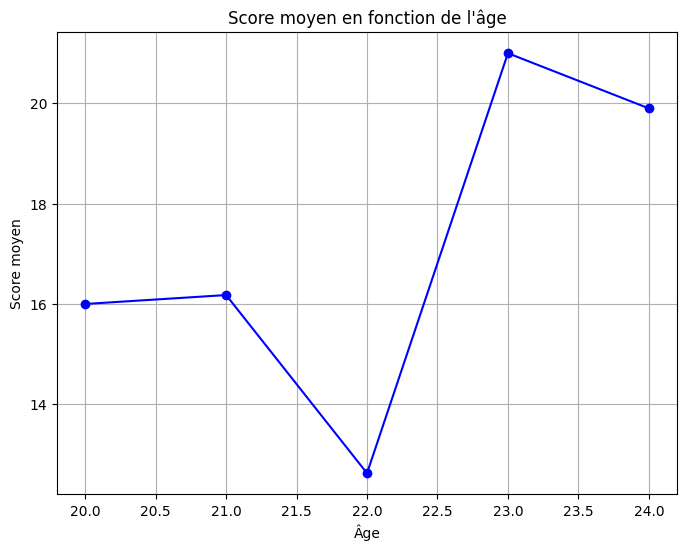

In [269]:
mean_score_by_age = dfc.groupby('Age')['LastScore'].mean()

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(mean_score_by_age.index, mean_score_by_age.values, marker='o', color='b', linestyle='-')
plt.xlabel('Âge')
plt.ylabel('Score moyen')
plt.title('Score moyen en fonction de l\'âge')
plt.grid()
plt.show()

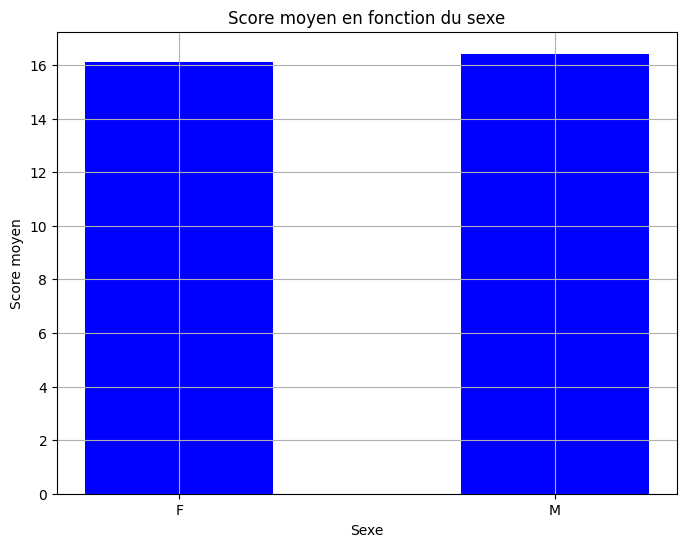

In [270]:
mean_score_by_sexe = dfc.groupby('Sexe')['LastScore'].mean()

# Création du graphique
plt.figure(figsize=(8, 6))
plt.bar(mean_score_by_sexe.index, mean_score_by_sexe.values, color='b', width=0.5)
plt.xlabel('Sexe')
plt.ylabel('Score moyen')
plt.title('Score moyen en fonction du sexe')
plt.grid()
plt.show()

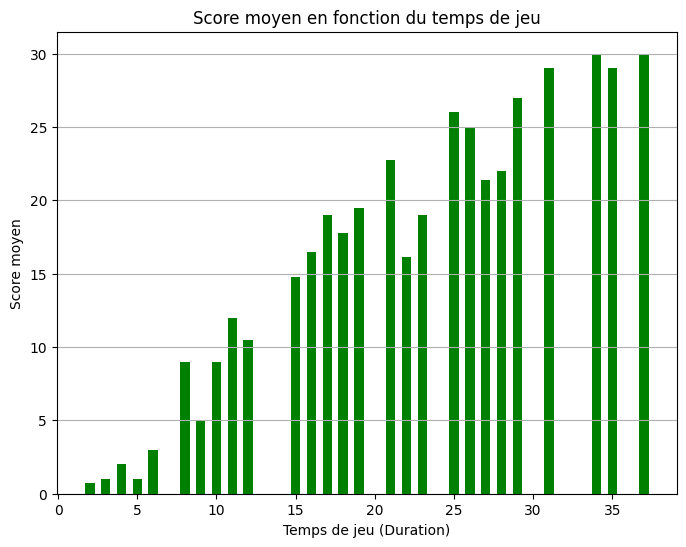

In [271]:
mean_score_by_duration = dfc.groupby('Duration')['LastScore'].mean()

# Création de l'histogramme
plt.figure(figsize=(8, 6))
plt.bar(mean_score_by_duration.index, mean_score_by_duration.values, color='g', width=0.6)
plt.xlabel('Temps de jeu (Duration)')
plt.ylabel('Score moyen')
plt.title('Score moyen en fonction du temps de jeu')
plt.grid(axis='y')
plt.show()

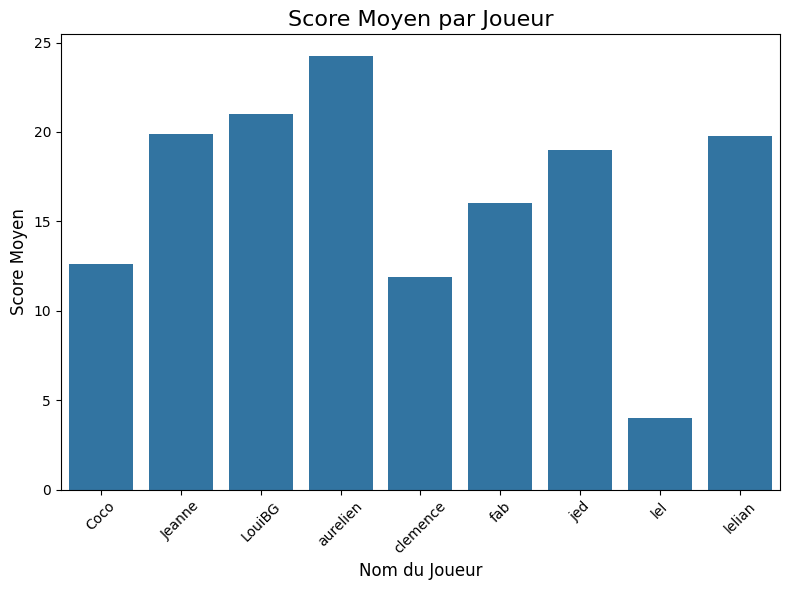

In [272]:
result = dfc.groupby('Name').agg(
    Number_of_Games=('Name', 'count'),
    Average_Score=('LastScore', 'mean')
).reset_index()

# Créer un graphique
plt.figure(figsize=(8, 6))
sns.barplot(data=result, x='Name', y='Average_Score')

# Ajouter des labels et un titre
plt.title('Score Moyen par Joueur', fontsize=16)
plt.xlabel('Nom du Joueur', fontsize=12)
plt.ylabel('Score Moyen', fontsize=12)
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()

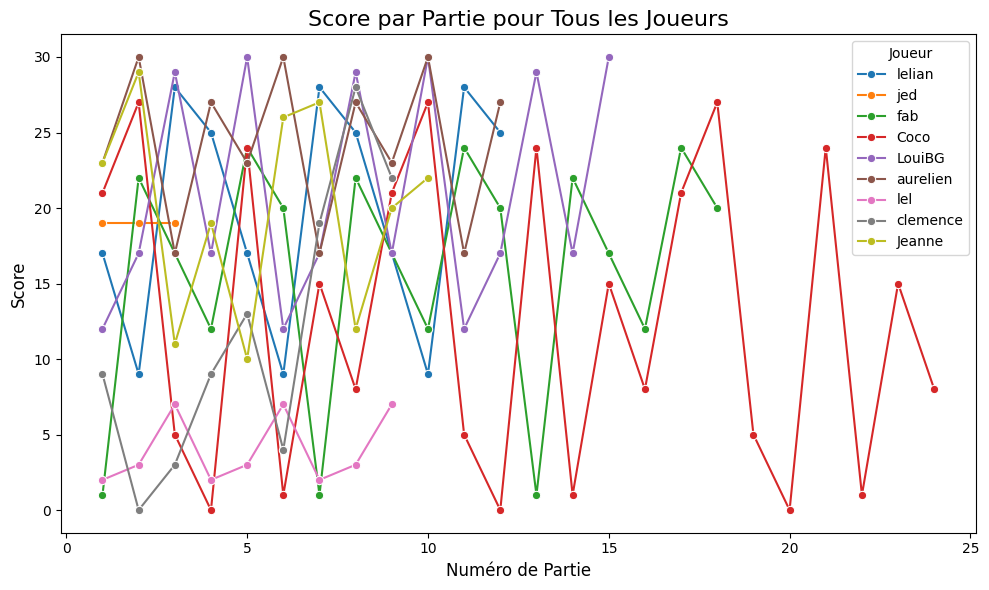

In [273]:
df = dfc.copy()

df['GameNumber'] = df.groupby('Name').cumcount() + 1

# Créer un graphique des scores par partie pour tous les joueurs
plt.figure(figsize=(10, 6))

# Utilisation de seaborn pour tracer les scores par partie pour tous les joueurs
sns.lineplot(data=df, x='GameNumber', y='LastScore', hue='Name', marker='o')

# Ajouter des labels et un titre
plt.title('Score par Partie pour Tous les Joueurs', fontsize=16)
plt.xlabel('Numéro de Partie', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.legend(title='Joueur')
plt.show()

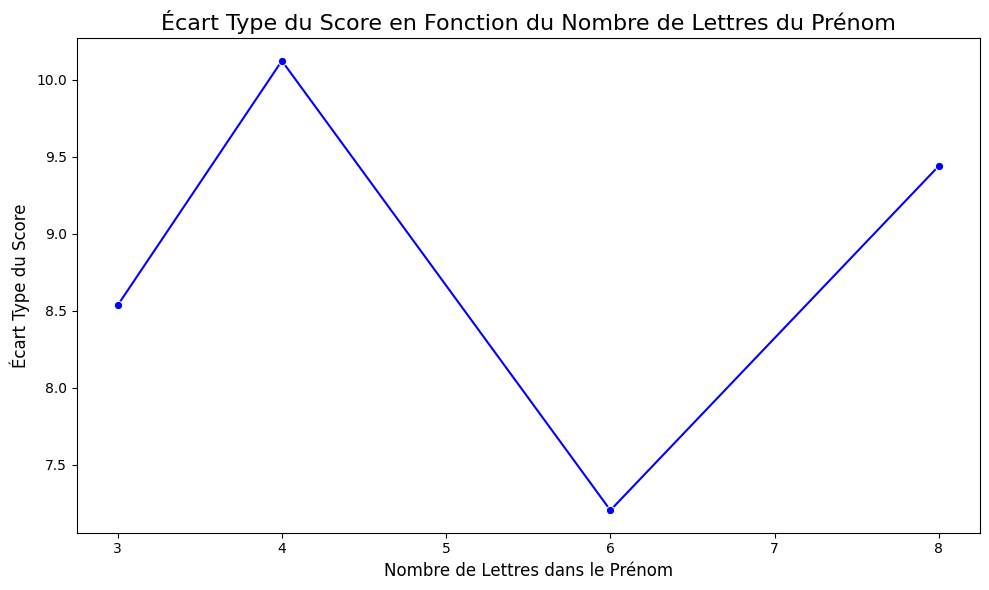

In [274]:
df = dfc.copy()

# Ajouter une colonne pour le nombre de lettres dans le prénom
df['NameLength'] = df['Name'].apply(len)

# Calculer l'écart type du score pour chaque longueur de prénom
std_dev = df.groupby('NameLength')['LastScore'].std().reset_index()

# Créer un graphique de l'écart type du score en fonction du nombre de lettres du prénom
plt.figure(figsize=(10, 6))

# Utilisation de seaborn pour tracer l'écart type du score en fonction de la longueur du prénom
sns.lineplot(data=std_dev, x='NameLength', y='LastScore', marker='o', color='blue')

# Ajouter des labels et un titre
plt.title('Écart Type du Score en Fonction du Nombre de Lettres du Prénom', fontsize=16)
plt.xlabel('Nombre de Lettres dans le Prénom', fontsize=12)
plt.ylabel('Écart Type du Score', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()